In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays

In [4]:
from triple_agent.reports.game_outcomes import game_outcomes

In [5]:
def select_short_veranda(game):
    return game.venue == "Veranda" and game.duration < 120

In [6]:
short_veranda_games = get_parsed_replays(select_short_veranda)

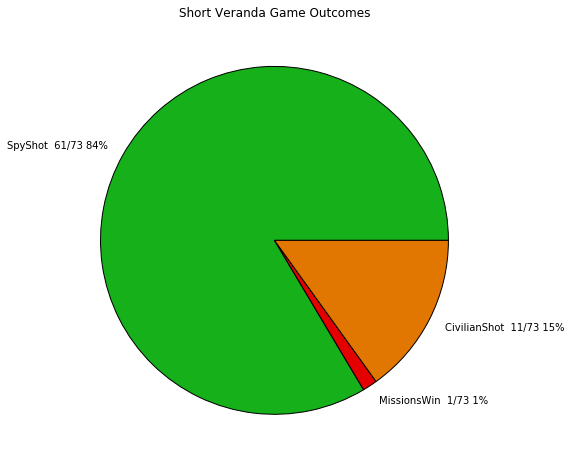

In [7]:
game_outcomes(short_veranda_games, "Short Veranda Game Outcomes")

In [8]:
def select_long_veranda(game):
    return game.venue == "Veranda" and game.duration >= 120

In [9]:
long_veranda_games = get_parsed_replays(select_long_veranda)

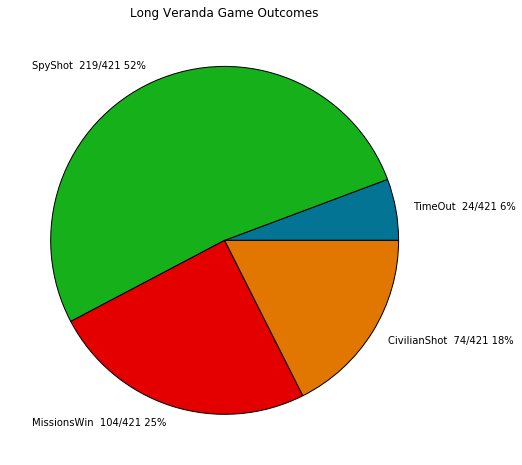

In [10]:
game_outcomes(long_veranda_games, "Long Veranda Game Outcomes")